In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df1=pd.read_csv("scaler_apollo_hospitals.csv")

In [3]:
df1.columns

Index(['Unnamed: 0', 'age', 'sex', 'smoker', 'region', 'viral load',
       'severity level', 'hospitalization charges'],
      dtype='object')

In [5]:
df1.drop(columns=df1.columns[0],inplace=True)

In [3]:
df1.describe()
df1.isna().sum()

Unnamed: 0                 0
age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [4]:
df1

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...,...
1333,1333,50,male,no,northwest,10.32,3,26501
1334,1334,18,female,no,northeast,10.64,0,5515
1335,1335,18,female,no,southeast,12.28,0,4075
1336,1336,21,female,no,southwest,8.60,0,5020


In [5]:
df1.corr()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
Unnamed: 0,1.000000,-0.031467,-0.036171,0.025221,-0.003373
age,-0.031467,1.000000,0.109300,0.042469,0.299008
viral load,-0.036171,0.109300,1.000000,0.012729,0.198388
severity level,0.025221,0.042469,0.012729,1.000000,0.067998
hospitalization charges,-0.003373,0.299008,0.198388,0.067998,1.000000


In [6]:
#outlier removal for hospitalization charges
purchase_h=df1['hospitalization charges']
qm1=np.quantile(purchase_h,0.25)
qm3=np.quantile(purchase_h,0.75)
iqrm=qm3-qm1
upper_bound_m=qm3+(1.5*iqrm)
lower_bound_m=qm1-(1.5*iqrm)
df=df1[df1['hospitalization charges']>lower_bound_m]
df=df1[df1['hospitalization charges']<upper_bound_m]
df

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...,...
1333,1333,50,male,no,northwest,10.32,3,26501
1334,1334,18,female,no,northeast,10.64,0,5515
1335,1335,18,female,no,southeast,12.28,0,4075
1336,1336,21,female,no,southwest,8.60,0,5020


<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

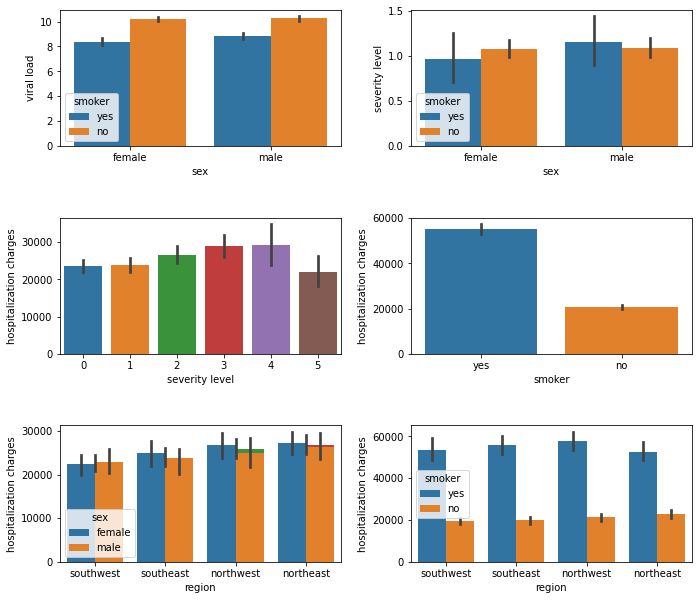

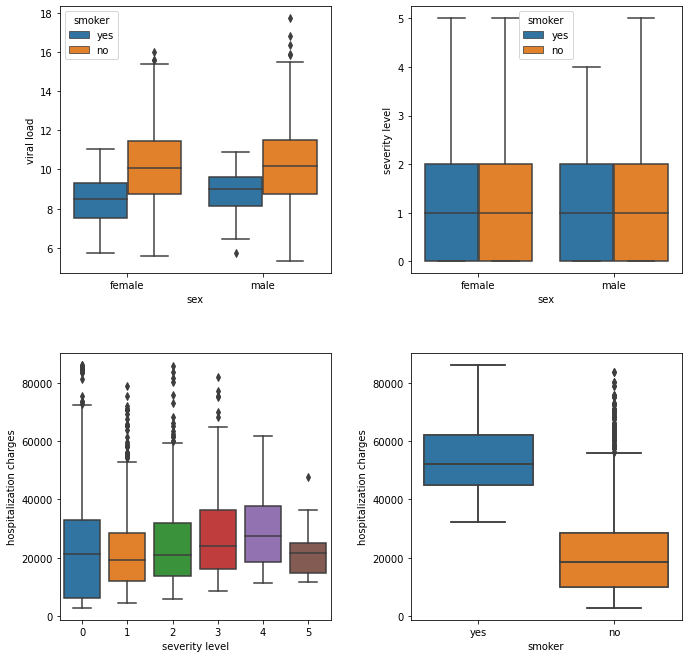

In [7]:
import  matplotlib.pyplot as plt
figure, axes = plt.subplots(nrows=3, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,9)
sns.barplot(x='sex', y='viral load', data=df, ax=axes[0,0],hue=df['smoker'])
sns.barplot(x='sex', y='severity level', data=df, ax=axes[0,1],hue=df['smoker'])
sns.barplot(x='severity level', y='hospitalization charges', data=df, ax=axes[1,0])
sns.barplot(x='smoker', y='hospitalization charges', data=df, ax=axes[1,1])
sns.barplot(x='region', y='hospitalization charges', data=df, ax=axes[2,0])
sns.barplot(x='region', y='hospitalization charges', data=df, ax=axes[2,0],hue=df['sex'])
sns.barplot(x='region', y='hospitalization charges', data=df, ax=axes[2,1],hue=df['smoker'])



figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,10)

sns.boxplot(x='sex', y='viral load', data=df, ax=axes[0,0],hue=df['smoker'])
sns.boxplot(x='sex', y='severity level', data=df, ax=axes[0,1],hue=df['smoker'])
sns.boxplot(x='severity level', y='hospitalization charges', data=df, ax=axes[1,0])
sns.boxplot(x='smoker', y='hospitalization charges', data=df, ax=axes[1,1])
sns.boxplot(x='smoker', y='hospitalization charges', data=df, ax=axes[1,1])


TypeError: histplot() got multiple values for argument 'data'

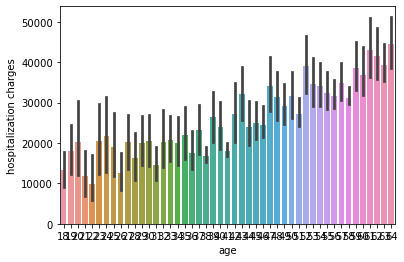

In [23]:
sns.barplot(x='age', y='hospitalization charges', data=df)


In [12]:
#Try establishing a relation between the dependent and independent variable (Dependent “hospitalization charges” & Independent: Smoker, Severity Level etc)


In [10]:
#Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)
#H0: Hospitalization by smoking<Hospitalization by not smoking
#H1:Hospitalization by smoking>Hospitalization by not smoking
    
from scipy import stats
x1=df[df['smoker']=='yes']['hospitalization charges']
n1=len(x1)
print(n1)
y1=df[df['smoker']=='no']['hospitalization charges']
n2=len(y1)
print(n2)
(stat,p_val)=stats.ttest_ind(a=x1, b=y1, equal_var=True)
alpha=0.05
if p_val>alpha:
    print("Fail to reject null hyoptehsisi")
    
if p_val<alpha:
    print("reject null hyoptehsis")

print(stat, p_val)

138
1061
reject null hyoptehsis
26.098730863028162 3.12649222185407e-119


In [11]:
#Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)
#H0: viral load of females=viral load of males
#H1: viral load of females!=viral load of males

x1=df[df['sex']=='female']['viral load']
n1=len(x1)
y1=df[df['sex']=='male']['viral load']
n2=len(y1)
(stat,p_val)=stats.ttest_ind(a=x1, b=y1, equal_var=True)
alpha=0.05
if p_val>alpha:
    print("Fail to reject null hyoptehsisi")
    
if p_val<alpha:
    print("reject null hyoptehsis")
stat,p_val

Fail to reject null hyoptehsisi


(-0.9460853706266092, 0.34429598282535334)

In [12]:
# Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)
from scipy.stats import f_oneway
df3=df[df['sex']=='female']
df3
alpha =0.05
#H0 = (mean(0 Severity level)=mean(1 Severity level)=mean(2 Severity level))
#H1 = (mean(0 Severity level)!=mean(1 Severity level)!=mean(2 Severity level))
(stat,p_val)=f_oneway(df3[df3['severity level']==0]['viral load'],df3[df3['severity level']==1] ['viral load'],df3[df3['severity level']==2] ['viral load'])
if p_val<alpha:
    print("reject null hyop")
    
if p_val>alpha:
     print("fail to reject null hyop")
(stat,p_val)        

fail to reject null hyop


(0.07443469817375759, 0.9282779784079939)

In [18]:
#Is the proportion of smoking significantly different across different regions? (Chi-square)


# H0=mean of hospitalization charges equal mean smoker
# H1=mean of hospitalization equal mean of smoker
data_crosstab = pd.crosstab(df['region'],
                        df['smoker'],
                       margins=True, margins_name="Total")
rows = df['region'].unique()
columns = df['smoker'].unique()
chi_square = 0
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E
alpha = 0.05
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
if chi_square > critical_value:
    conclusion = f" region and smoker are dependent"
else:
    conclusion = f" region and smoker are independent"



print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)

chisquare-score is: 2.9745627841799864  and critical value is: 7.814727903251179
 hospitalization charges and severity level are independent


In [ ]:
Insights
1.All numerical variables are Positively correlated to each other
2.hospitalization charges are higher for sevirty level 3,4 hospitalization rate is higher for severity level 3,4
3. severity increases with smokinh habits, seen more hospitalization in that in case for men
4. men are seen having higly viral load
5. norheast resion no of hospitalization is Higher for both male and female as compatred to other region
6. northweat region is having higer smoking habits in make and female as compred to other region
7.prportion proportion of smoking significantly different across different regions
8.Hospitalization by smoking>Hospitalization by not smoking
9.viral load of females!=viral load of males
10.viral load is Higher in male than female